# 2.3 Random Forest on Weather Dataset

## Contents
### 1. Import libraries and data sets
### 2. Reduce data set to one decade
### 3. Split data
### 4. Random Forest on all stations, 1960s
### 5. Random Forest Basel
### 6. Random Forest Dusseldorf
### 7. Random Forest Maastricht

## 1. Import libraries and data sets

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import reshape, argmax
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [47]:
path = r'/Users/susanwang/Documents/CF_ML/ML_Project'

In [48]:
weather_df = pd.read_csv(os.path.join(path, 'Data Sets', 'cleaned_weather.csv'), index_col=False)

In [49]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96


In [50]:
weather_df.shape

(22950, 135)

In [51]:
answers_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [52]:
answers_df.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# remove date column
answers_df.drop(columns=['DATE'], inplace=True)

In [54]:
answers_df.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
answers_df.shape

(22950, 15)

## 2. Reduce data set to one decade

NOTE: the cleaned data set does not contain the 'DATE' column anymore, so we cannot filter by years. Instead, I will have to just take the first ten years, meaning the first 3653 rows (the 1960s had three leap years)

In [56]:
weather1960s = weather_df[:3653]
weather1960s.shape

(3653, 135)

In [57]:
weather1960s.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96


In [58]:
answers1960s = answers_df[:3653]
answers1960s.shape

(3653, 15)

In [59]:
answers1960s.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Split data

In [60]:
X = weather1960s.copy()
y = answers1960s.copy()

In [61]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2739, 135)
(914, 135)
(2739, 15)
(914, 15)


## 4. Random Forest all stations, 1960s

In [72]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#max_depth=15)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6061269146608315


### Plot trees

In [74]:
# tree 1
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], fontsize = 20, class_names=['Unpleasant', 'Pleasant'], filled=True)

[Text(0.3268320467371704, 0.9782608695652174, 'x[6] <= 11.65\ngini = 0.298\nsamples = 1733\nvalue = [[1989.0, 750.0]\n[1729.0, 1010.0]\n[1863.0, 876.0]\n[2368.0, 371.0]\n[2237.0, 502.0]\n[2238.0, 501.0]\n[2237.0, 502.0]\n[2007.0, 732.0]\n[2284.0, 455.0]\n[1548.0, 1191.0]\n[2230.0, 509.0]\n[2350.0, 389.0]\n[2739.0, 0.0]\n[2358.0, 381.0]\n[2593.0, 146.0]]'),
 Text(0.10744538564422648, 0.9347826086956522, 'x[24] <= 12.05\ngini = 0.073\nsamples = 969\nvalue = [[1500.0, 60.0]\n[1356.0, 204.0]\n[1447.0, 113.0]\n[1544.0, 16.0]\n[1535.0, 25.0]\n[1515.0, 45.0]\n[1537.0, 23.0]\n[1498.0, 62.0]\n[1543.0, 17.0]\n[1262.0, 298.0]\n[1542.0, 18.0]\n[1532.0, 28.0]\n[1560.0, 0.0]\n[1536.0, 24.0]\n[1537.0, 23.0]]'),
 Text(0.21713871619069847, 0.9565217391304348, 'True  '),
 Text(0.05490892299853513, 0.8913043478260869, 'x[86] <= 12.95\ngini = 0.031\nsamples = 815\nvalue = [[1276.0, 27.0]\n[1231.0, 72.0]\n[1300.0, 3.0]\n[1300.0, 3.0]\n[1296.0, 7.0]\n[1287.0, 16.0]\n[1300.0, 3.0]\n[1295.0, 8.0]\n[1294.0, 9.

In [75]:
# tree 2
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, filled=True)

[Text(0.3693849750336968, 0.9761904761904762, 'x[94] <= 10.75\ngini = 0.297\nsamples = 1725\nvalue = [[2046.0, 693.0]\n[1756.0, 983.0]\n[1873.0, 866.0]\n[2376.0, 363.0]\n[2228.0, 511.0]\n[2243.0, 496.0]\n[2228.0, 511.0]\n[2016.0, 723.0]\n[2283.0, 456.0]\n[1604.0, 1135.0]\n[2197.0, 542.0]\n[2370.0, 369.0]\n[2739.0, 0.0]\n[2349.0, 390.0]\n[2579.0, 160.0]]'),
 Text(0.12561123407057959, 0.9285714285714286, 'x[68] <= 9.85\ngini = 0.084\nsamples = 993\nvalue = [[1489, 104]\n[1416, 177]\n[1487, 106]\n[1571, 22]\n[1540, 53]\n[1520, 73]\n[1560, 33]\n[1523, 70]\n[1545, 48]\n[1285, 308]\n[1574, 19]\n[1558, 35]\n[1593, 0]\n[1576, 17]\n[1552, 41]]'),
 Text(0.24749810455213822, 0.9523809523809523, 'True  '),
 Text(0.06420686037250337, 0.8809523809523809, 'x[121] <= 2.85\ngini = 0.024\nsamples = 775\nvalue = [[1218.0, 16.0]\n[1187.0, 47.0]\n[1220.0, 14.0]\n[1233.0, 1.0]\n[1227.0, 7.0]\n[1226.0, 8.0]\n[1232.0, 2.0]\n[1233.0, 1.0]\n[1221.0, 13.0]\n[1121.0, 113.0]\n[1227.0, 7.0]\n[1231.0, 3.0]\n[1234.0,

### List of feature importances

In [76]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.0049182 , 0.0029415 , 0.        , 0.00412957, 0.01666132,
       0.00580875, 0.02489335, 0.00508821, 0.03437381, 0.00344741,
       0.00425105, 0.00418742, 0.00400258, 0.0157997 , 0.00423402,
       0.01202269, 0.00282072, 0.01035393, 0.        , 0.        ,
       0.        , 0.00427131, 0.01422682, 0.00569086, 0.01071519,
       0.00522212, 0.02950903, 0.00313132, 0.00282851, 0.00531724,
       0.00299482, 0.0125312 , 0.00394795, 0.00379878, 0.00263564,
       0.03552577, 0.00561123, 0.00333924, 0.00036336, 0.00397606,
       0.01747943, 0.00433425, 0.02410208, 0.00307392, 0.03637512,
       0.00226869, 0.00326259, 0.00468109, 0.00405932, 0.00723298,
       0.00344565, 0.00868061, 0.00272655, 0.00986432, 0.00276086,
       0.00483626, 0.00421196, 0.01568326, 0.00616444, 0.01656451,
       0.00316853, 0.01870131, 0.00248096, 0.00323604, 0.00366239,
       0.00371828, 0.01977418, 0.00411551, 0.0111138 , 0.00310988,
       0.01503589, 0.00553744, 0.00318951, 0.00403892, 0.00532

In [77]:
np.set_printoptions(threshold=1000)

In [78]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.0049182 , 0.0029415 , 0.        , 0.00412957, 0.01666132,
         0.00580875, 0.02489335, 0.00508821, 0.03437381],
        [0.00344741, 0.00425105, 0.00418742, 0.00400258, 0.0157997 ,
         0.00423402, 0.01202269, 0.00282072, 0.01035393],
        [0.        , 0.        , 0.        , 0.00427131, 0.01422682,
         0.00569086, 0.01071519, 0.00522212, 0.02950903],
        [0.00313132, 0.00282851, 0.00531724, 0.00299482, 0.0125312 ,
         0.00394795, 0.00379878, 0.00263564, 0.03552577],
        [0.00561123, 0.00333924, 0.00036336, 0.00397606, 0.01747943,
         0.00433425, 0.02410208, 0.00307392, 0.03637512],
        [0.00226869, 0.00326259, 0.00468109, 0.00405932, 0.00723298,
         0.00344565, 0.00868061, 0.00272655, 0.00986432],
        [0.00276086, 0.00483626, 0.00421196, 0.01568326, 0.00616444,
         0.01656451, 0.00316853, 0.01870131, 0.00248096],
        [0.00323604, 0.00366239, 0.00371828, 0.01977418, 0.00411551,
         0.0111138 , 0.00310988, 0.0150358

In [79]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09881473, 0.06111952, 0.06963532, 0.07271123, 0.09865469,
       0.04622181, 0.07457207, 0.0693034 , 0.09582551, 0.06891734,
       0.07301263, 0.05521575, 0.03284321, 0.05307752, 0.03007525])

In [84]:
# 15 for 15 stations

In [80]:
# list of stations
stations = list()
for c in weather_df.columns:
    if c.split('_', 1)[0] not in stations:
        stations.append(c.split('_', 1)[0])

stations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [81]:
important = pd.Series(sumarray, index = stations) #.sort_values(ascending = False)
important

BASEL         0.098815
BELGRADE      0.061120
BUDAPEST      0.069635
DEBILT        0.072711
DUSSELDORF    0.098655
HEATHROW      0.046222
KASSEL        0.074572
LJUBLJANA     0.069303
MAASTRICHT    0.095826
MADRID        0.068917
MUNCHENB      0.073013
OSLO          0.055216
SONNBLICK     0.032843
STOCKHOLM     0.053078
VALENTIA      0.030075
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


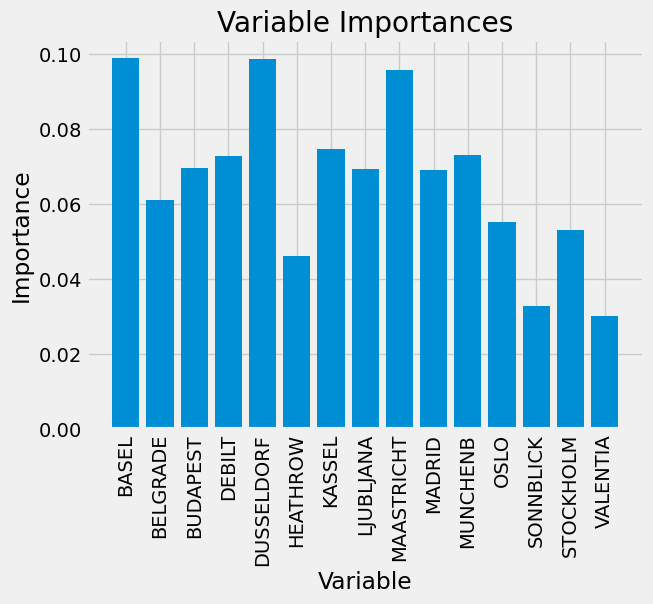

In [85]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

## 5. Random Forest - Basel

### Create Basel subset

In [86]:
# Basel columns
basel_col = [c for c in weather_df.columns if c.split('_')[0] == 'BASEL']
basel_col

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [87]:
basel_df = weather_df[basel_col]
basel_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0


In [89]:
basel_df.shape

(22950, 9)

In [88]:
answers_df.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

### Split data

In [90]:
X = basel_df.copy()
y = answers_df['BASEL_pleasant_weather']

In [91]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 9)
(5738, 9)
(17212,)
(5738,)


### Run Random Forest

In [94]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [95]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


### Plot trees

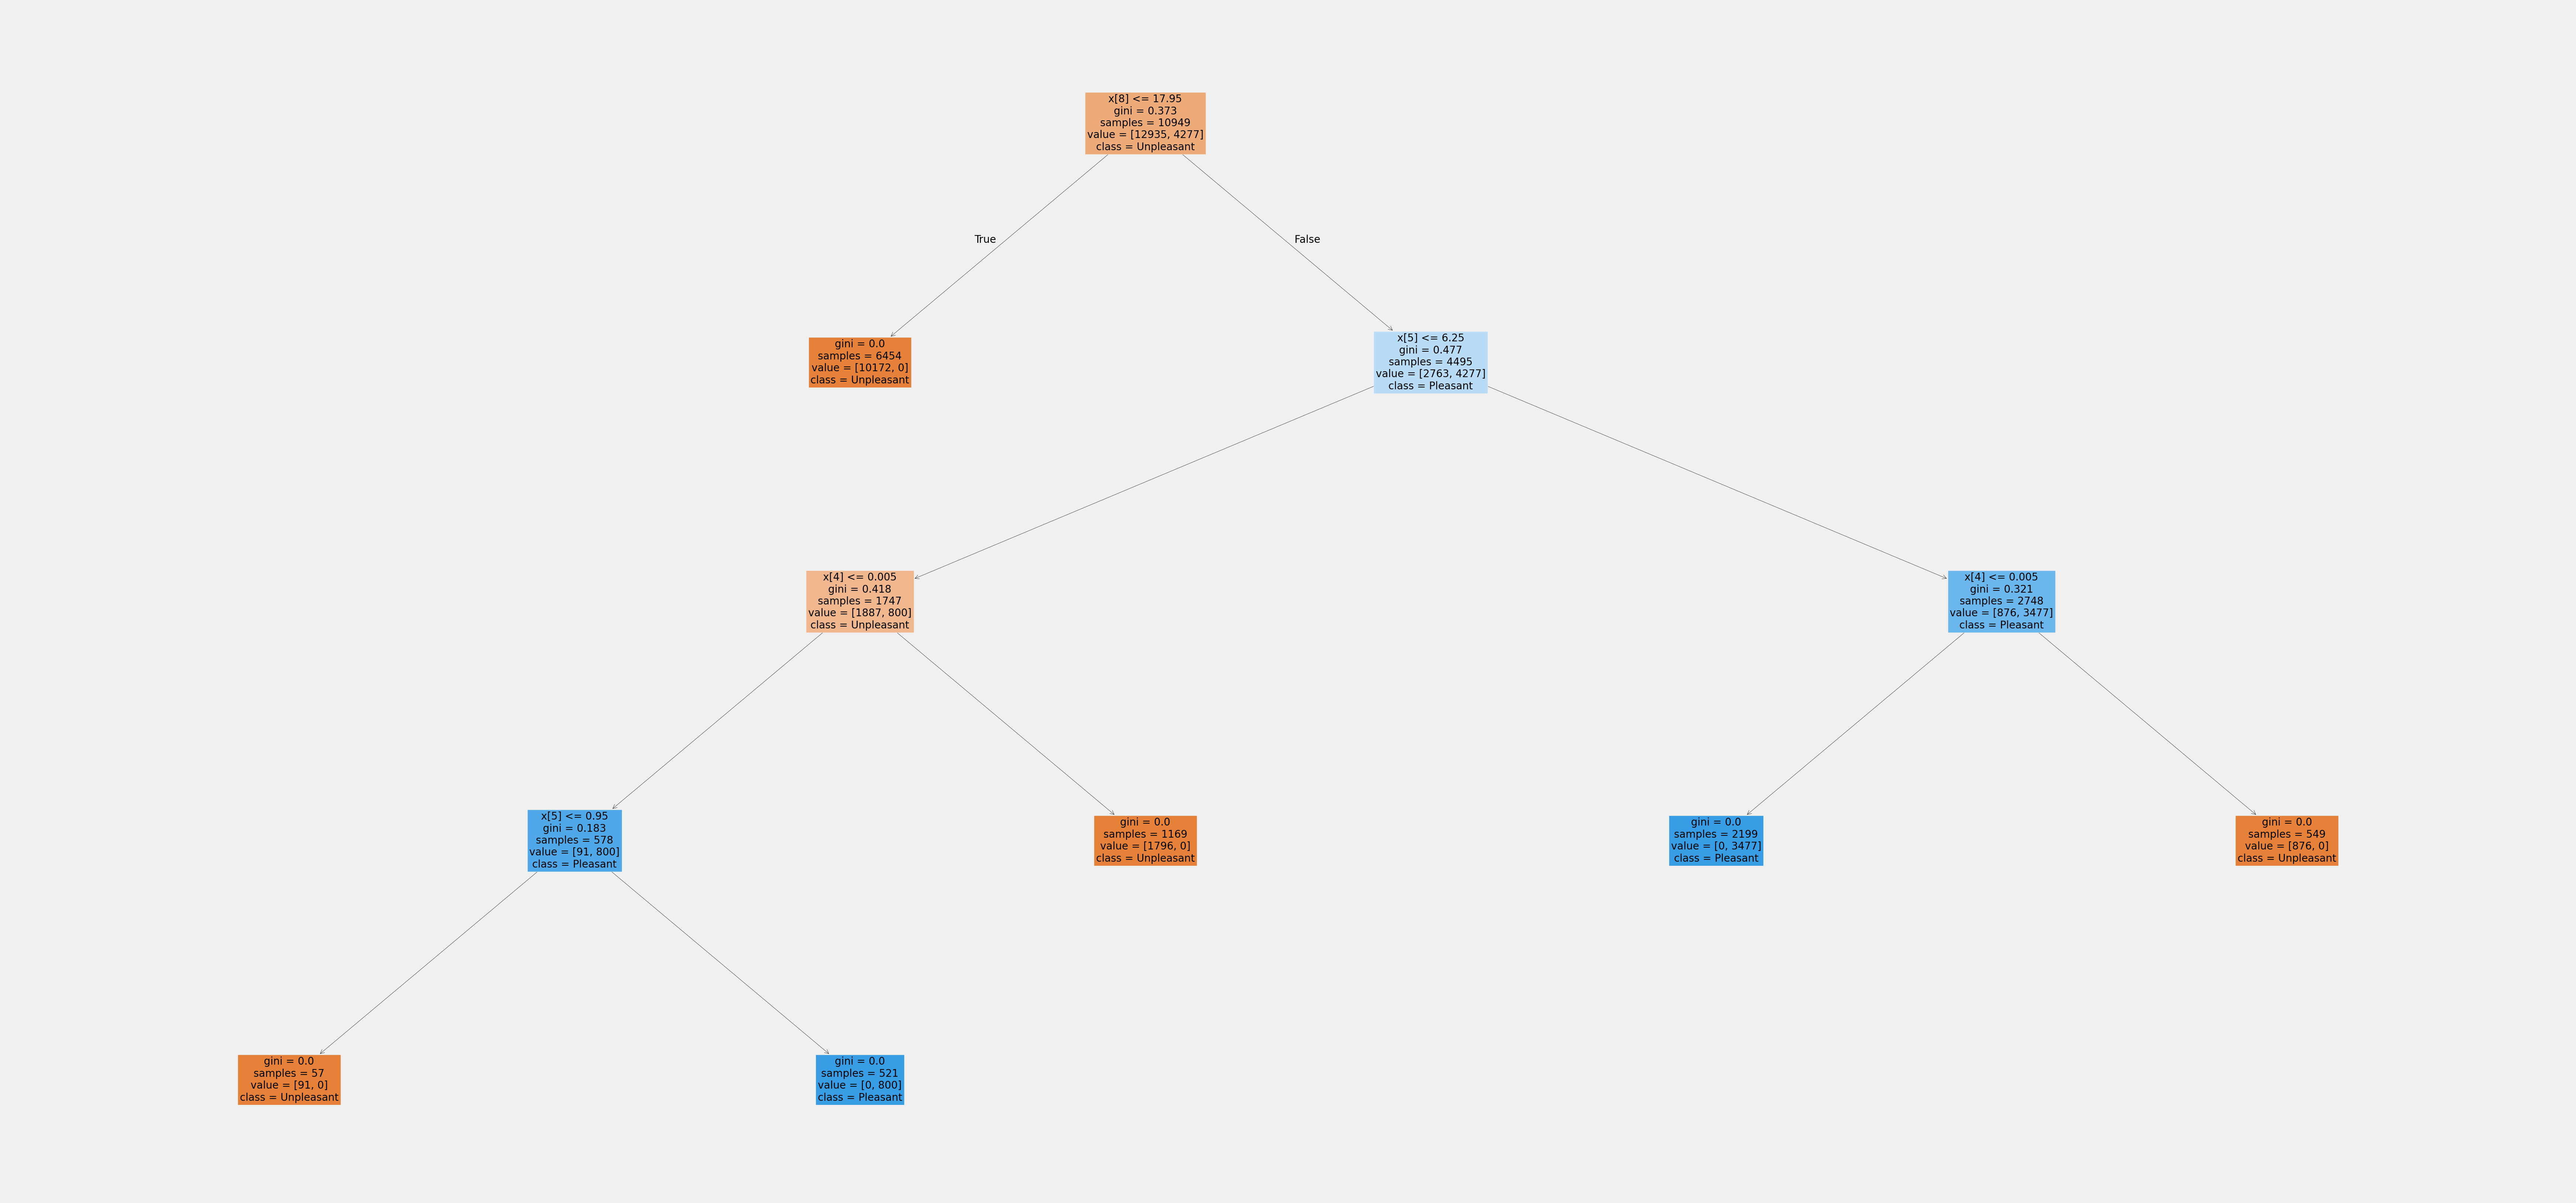

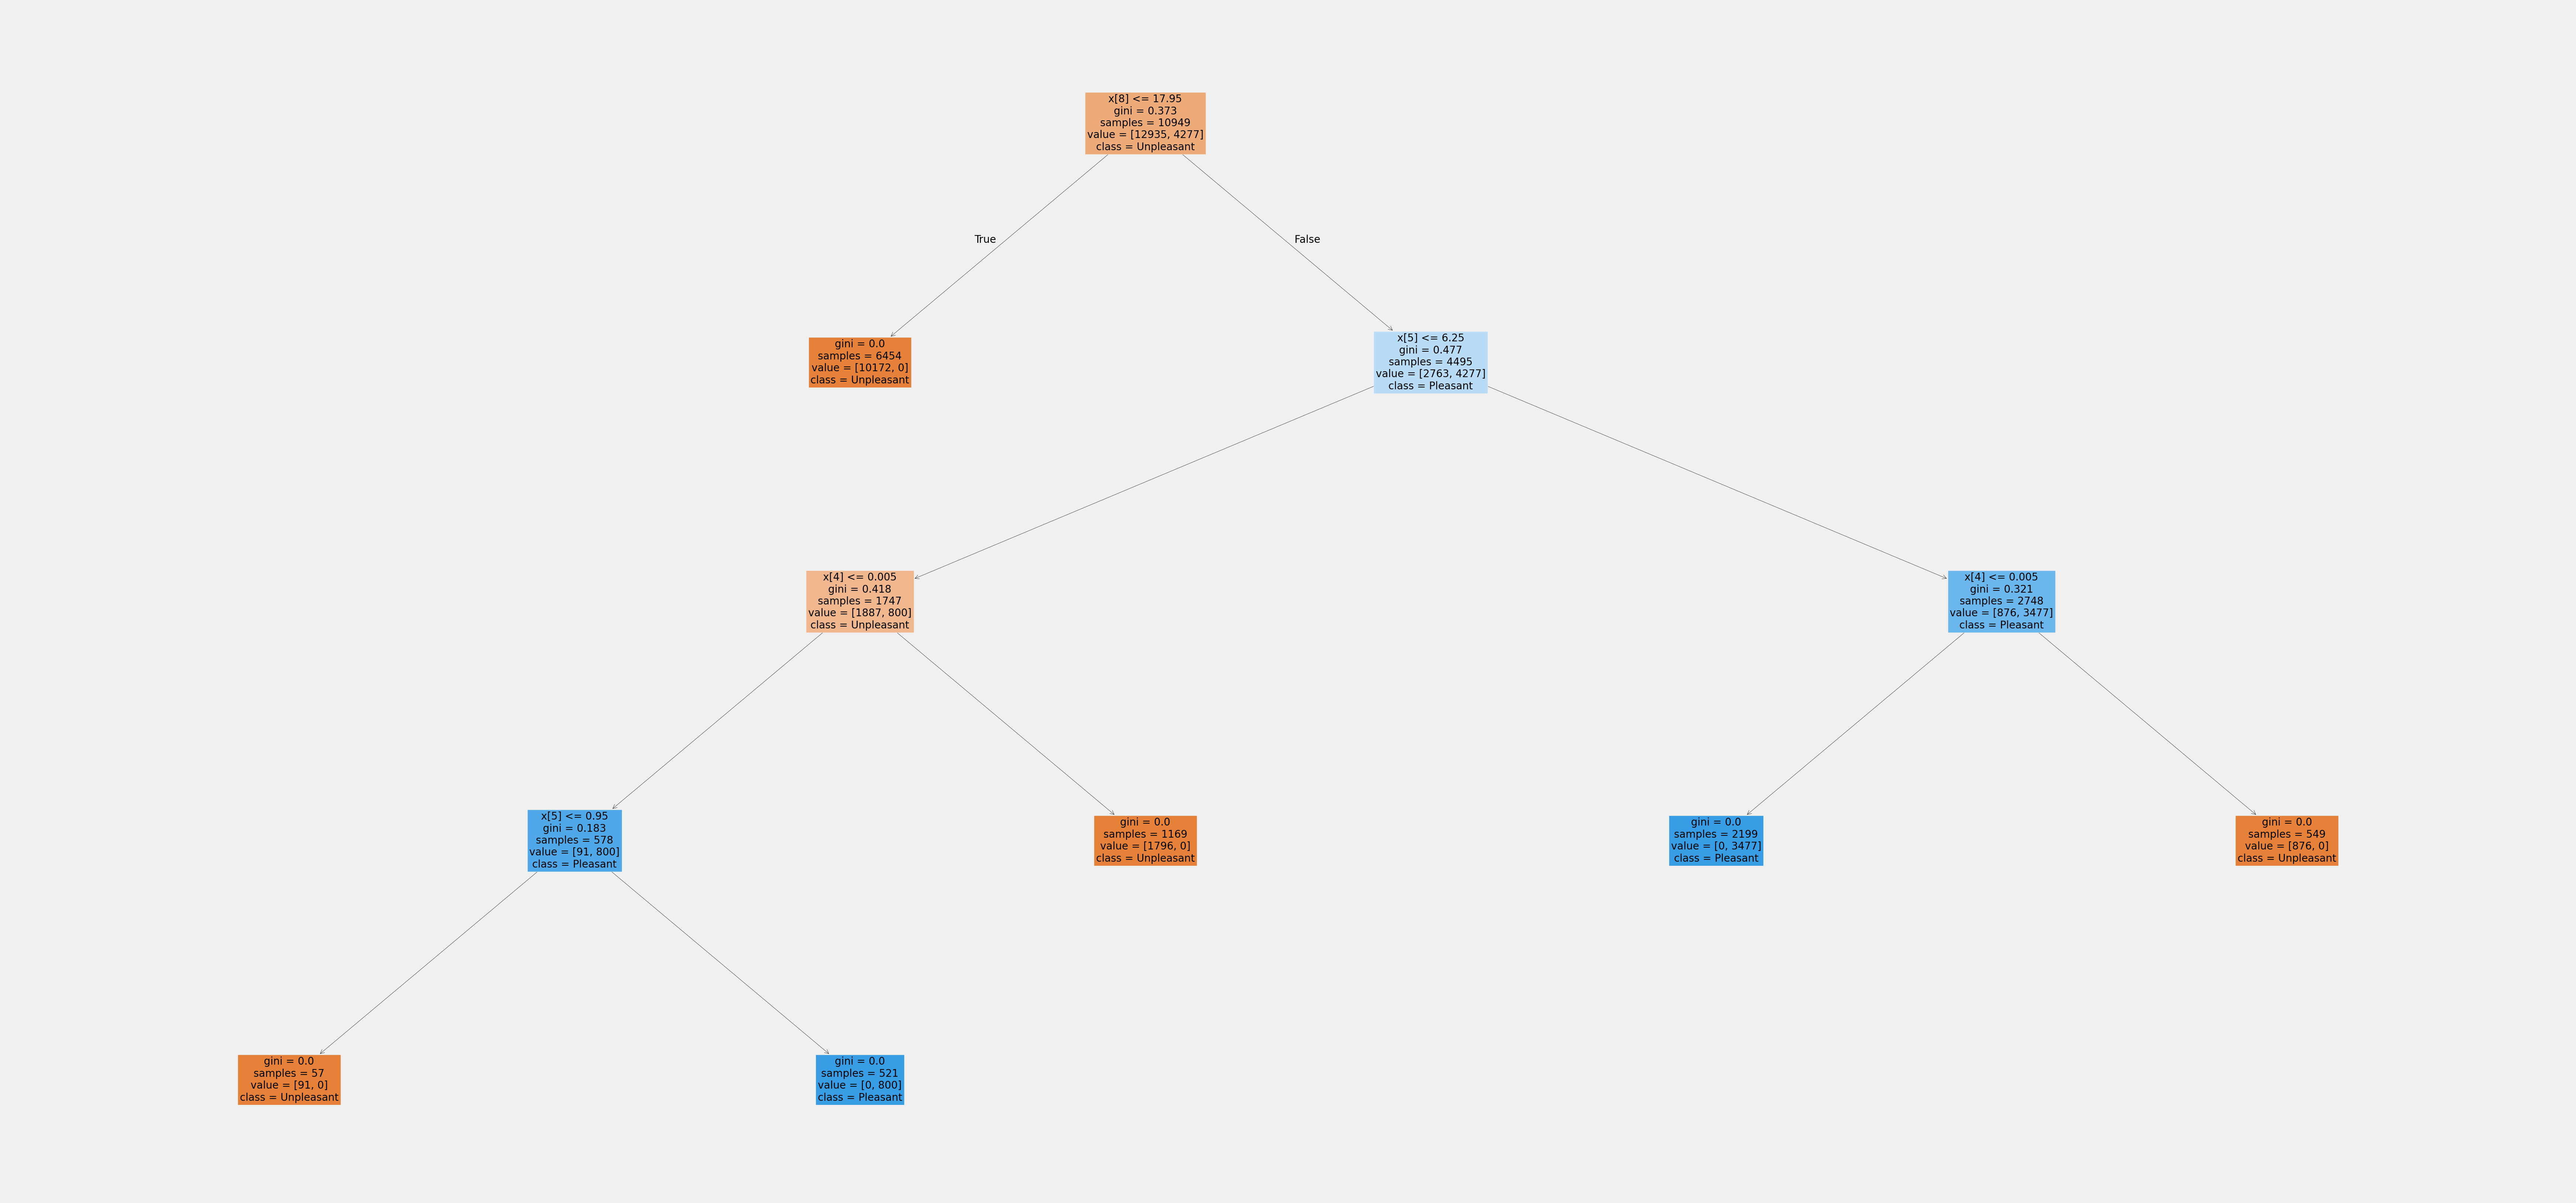

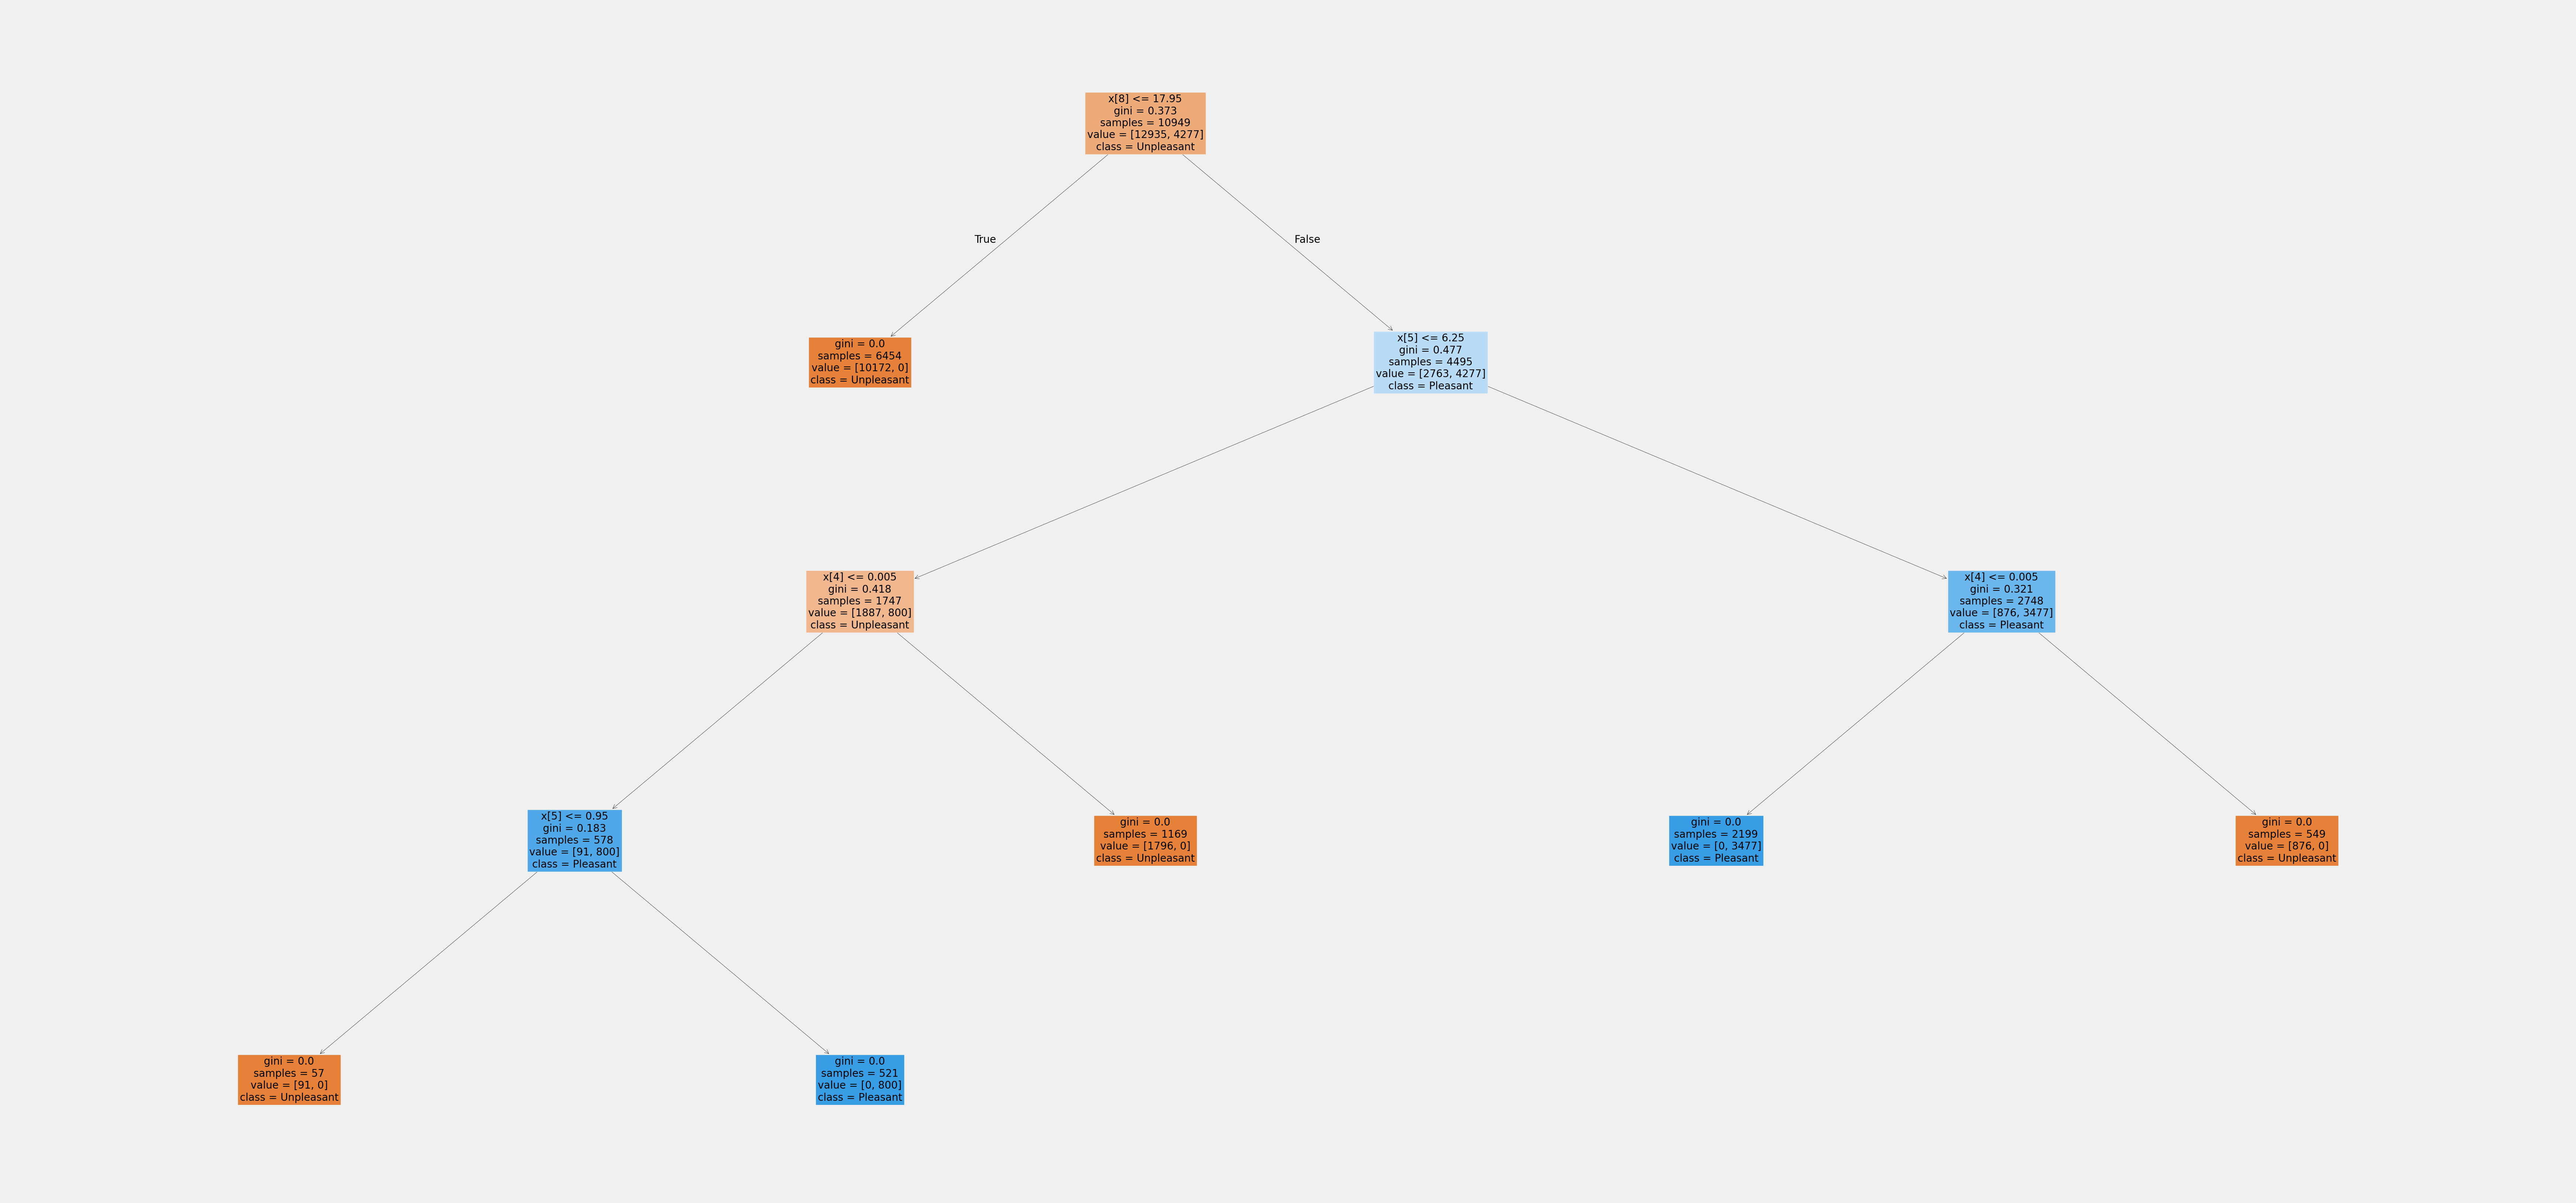

In [98]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], fontsize = 20, class_names=['Unpleasant', 'Pleasant'], filled=True)
plt.show()

### List of feature importances

In [99]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.0271807 , 0.00628845, 0.00581059, 0.102087  , 0.31936681,
       0.13790932, 0.113277  , 0.02221465, 0.26586548])

In [101]:
# list of observations
observations = list()
for c in weather_df.columns:
    if c.split('_', 1)[1] not in observations:
       observations.append(c.split('_', 1)[1])

observations

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [102]:
important = pd.Series(newarray, index = observations) #.sort_values(ascending = False)
important

cloud_cover         0.027181
humidity            0.006288
pressure            0.005811
global_radiation    0.102087
precipitation       0.319367
sunshine            0.137909
temp_mean           0.113277
temp_min            0.022215
temp_max            0.265865
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


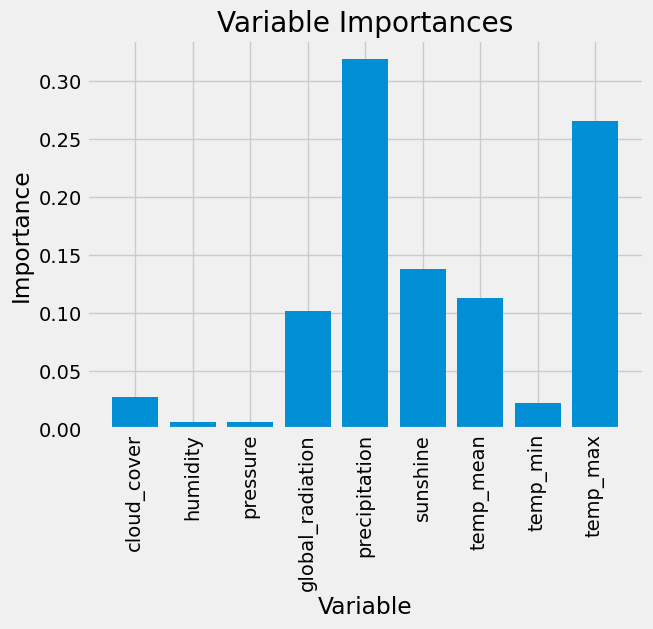

In [103]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(observations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, observations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

## 5. Random Forest - Dusseldorf

### Create Dusseldorf subset

In [119]:
# dusseldorf columns
duss_col = [c for c in weather_df.columns if c.split('_')[0] == 'DUSSELDORF']
duss_col

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [105]:
duss_df = weather_df[duss_col]
duss_df.head()

,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5
1,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0
2,7,0.95,1.0161,0.12,0.07,0.0,7.1,6.9,9.1
3,8,0.86,1.0161,0.12,0.02,0.0,6.8,3.6,8.0
4,7,0.92,1.0161,0.12,0.62,0.0,7.7,6.2,11.0


In [106]:
duss_df.shape

(22950, 9)

### Split data

In [107]:
X = duss_df.copy()
y = answers_df['DUSSELDORF_pleasant_weather']

In [108]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 9)
(5738, 9)
(17212,)
(5738,)


### Run Random Forest

In [111]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [112]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


### Plot trees

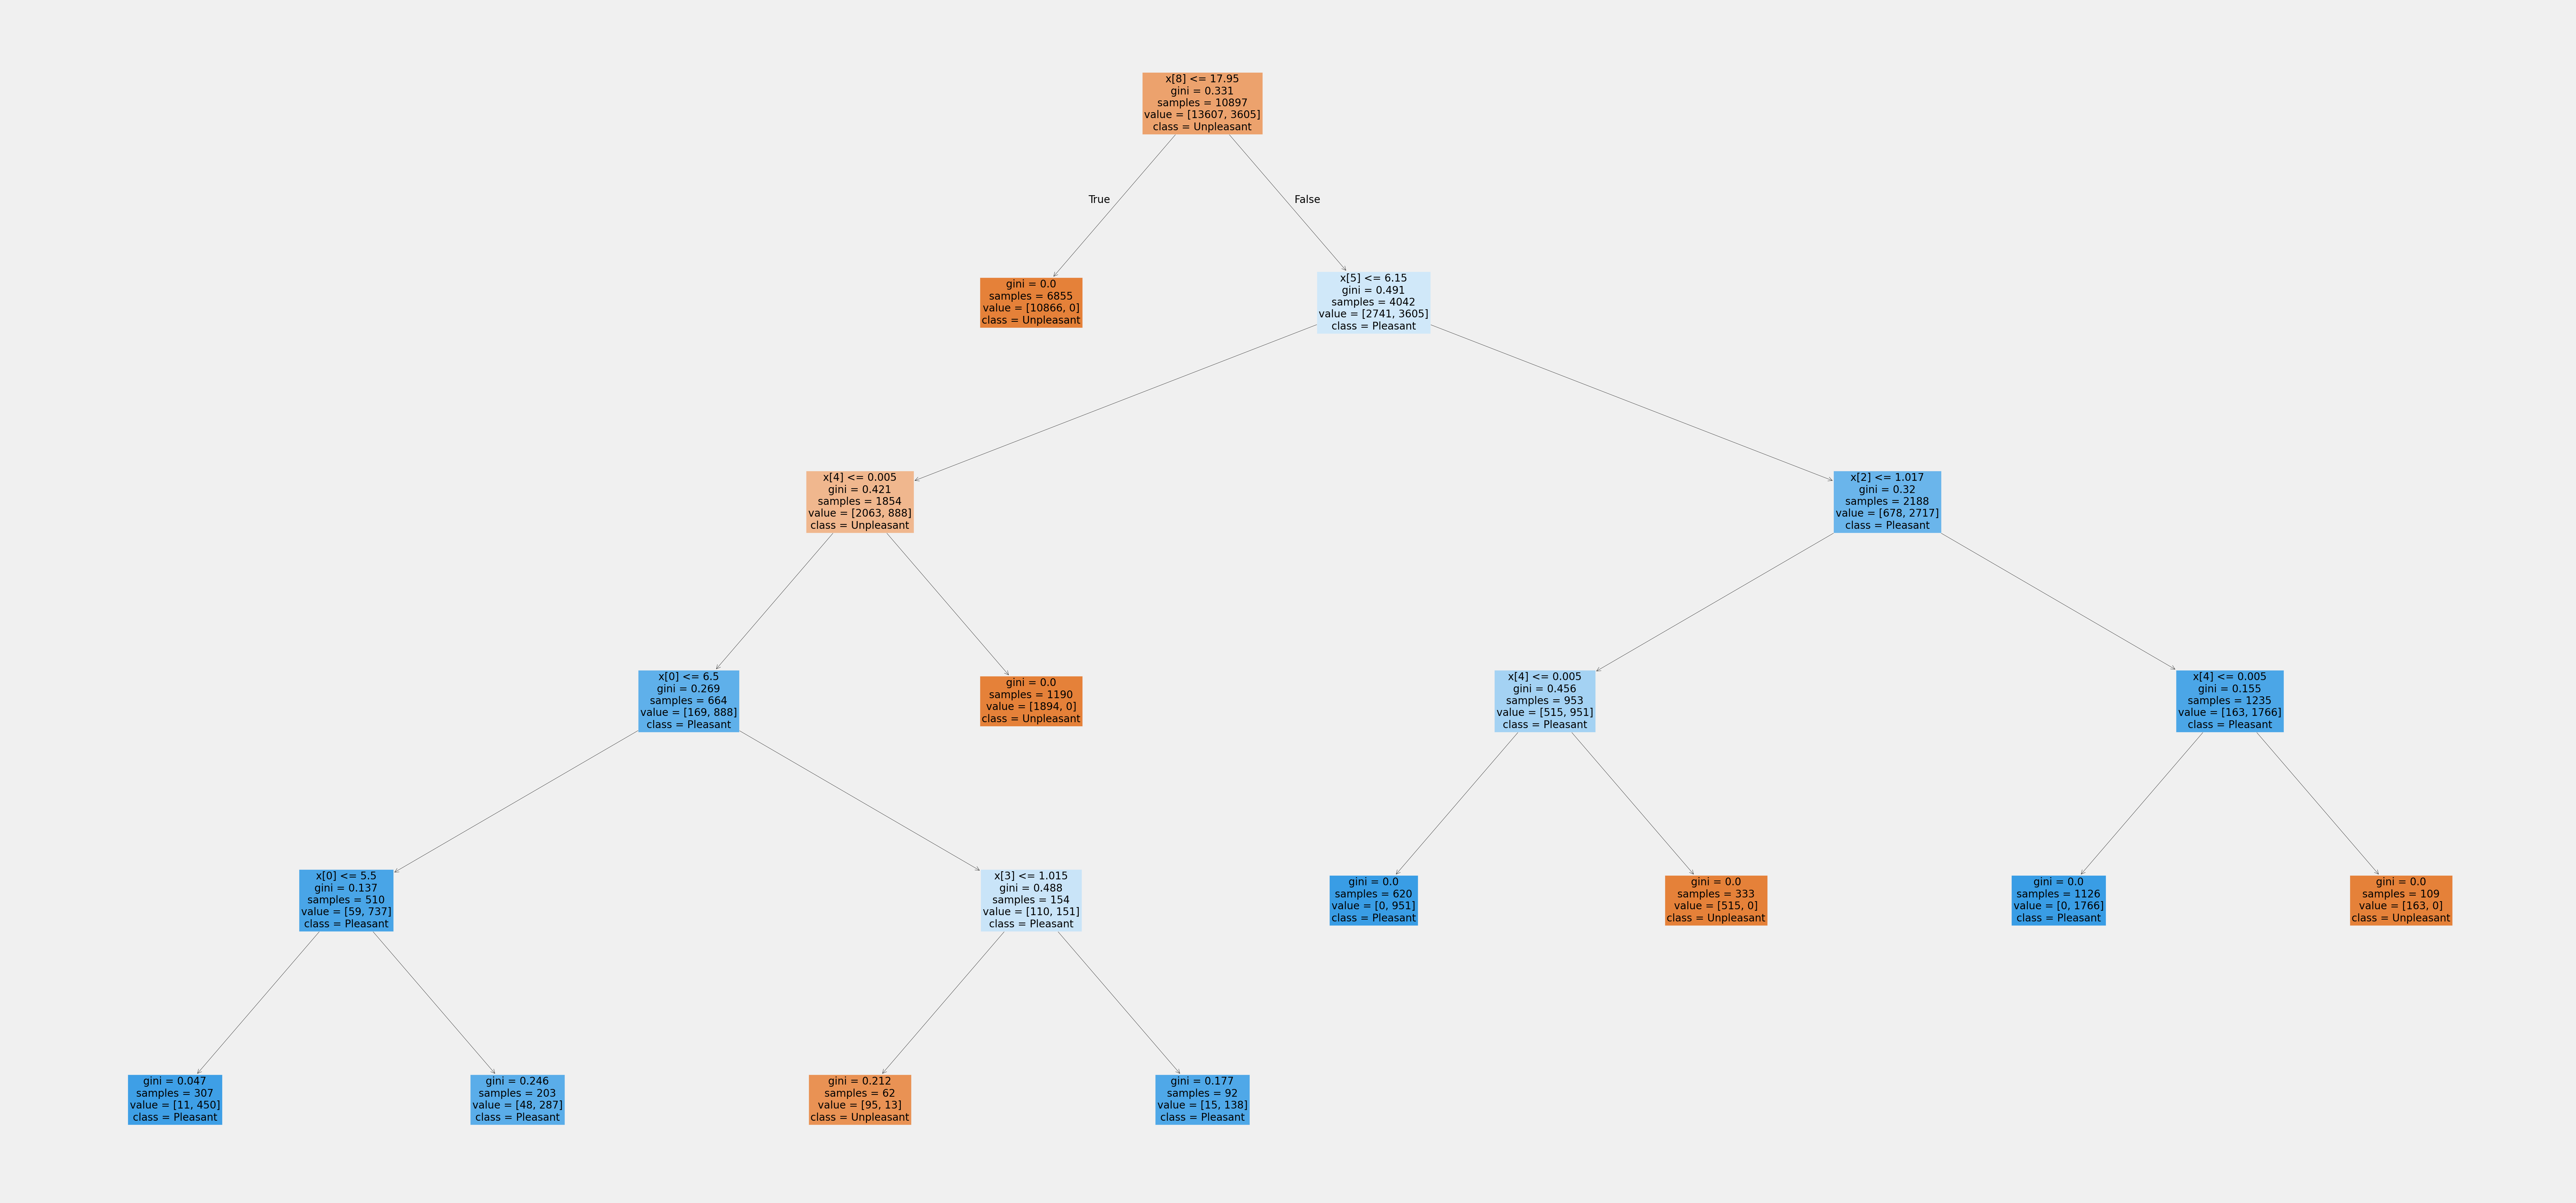

In [113]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], fontsize = 20, class_names=['Unpleasant', 'Pleasant'], filled=True)
plt.show()

### List of feature importances

In [114]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04120245, 0.01591345, 0.01265605, 0.11088307, 0.31090929,
       0.07829147, 0.10031361, 0.0143197 , 0.31551092])

In [116]:
important = pd.Series(newarray, index = observations) #.sort_values(ascending = False)
important

cloud_cover         0.041202
humidity            0.015913
pressure            0.012656
global_radiation    0.110883
precipitation       0.310909
sunshine            0.078291
temp_mean           0.100314
temp_min            0.014320
temp_max            0.315511
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


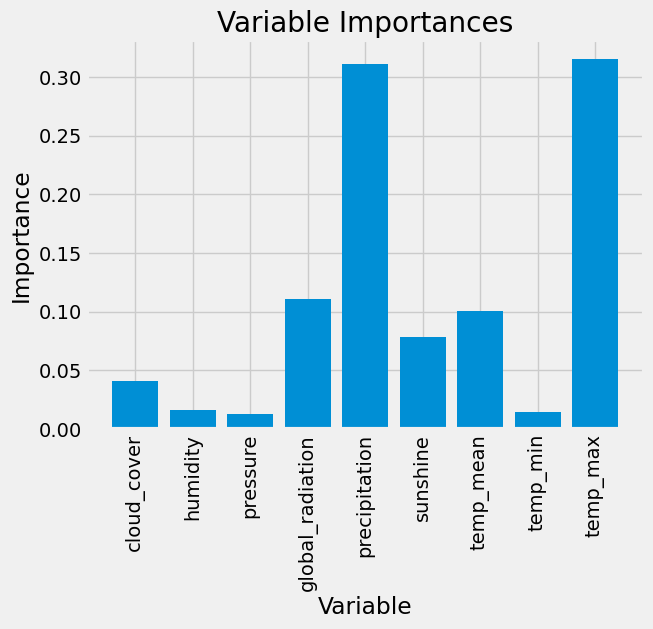

In [117]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(observations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, observations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

## 5. Random Forest - Maastricht

### Create Maastricht subset

In [118]:
# Maastricht columns
ma_col = [c for c in weather_df.columns if c.split('_')[0] == 'MAASTRICHT']
ma_col

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [120]:
ma_df = weather_df[ma_col]
ma_df.head()

,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1
1,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9
2,7,0.97,1.0167,0.12,0.46,0.0,6.9,5.5,9.9
3,7,0.89,1.0277,0.16,0.00,0.3,7.0,3.0,10.0
4,7,0.92,1.0259,0.12,0.56,0.0,8.1,2.5,11.1


In [121]:
ma_df.shape

(22950, 9)

### Split data

In [122]:
X = ma_df.copy()
y = answers_df['MAASTRICHT_pleasant_weather']

In [123]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 9)
(5738, 9)
(17212,)
(5738,)


### Run Random Forest

In [126]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [127]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


### Plot trees

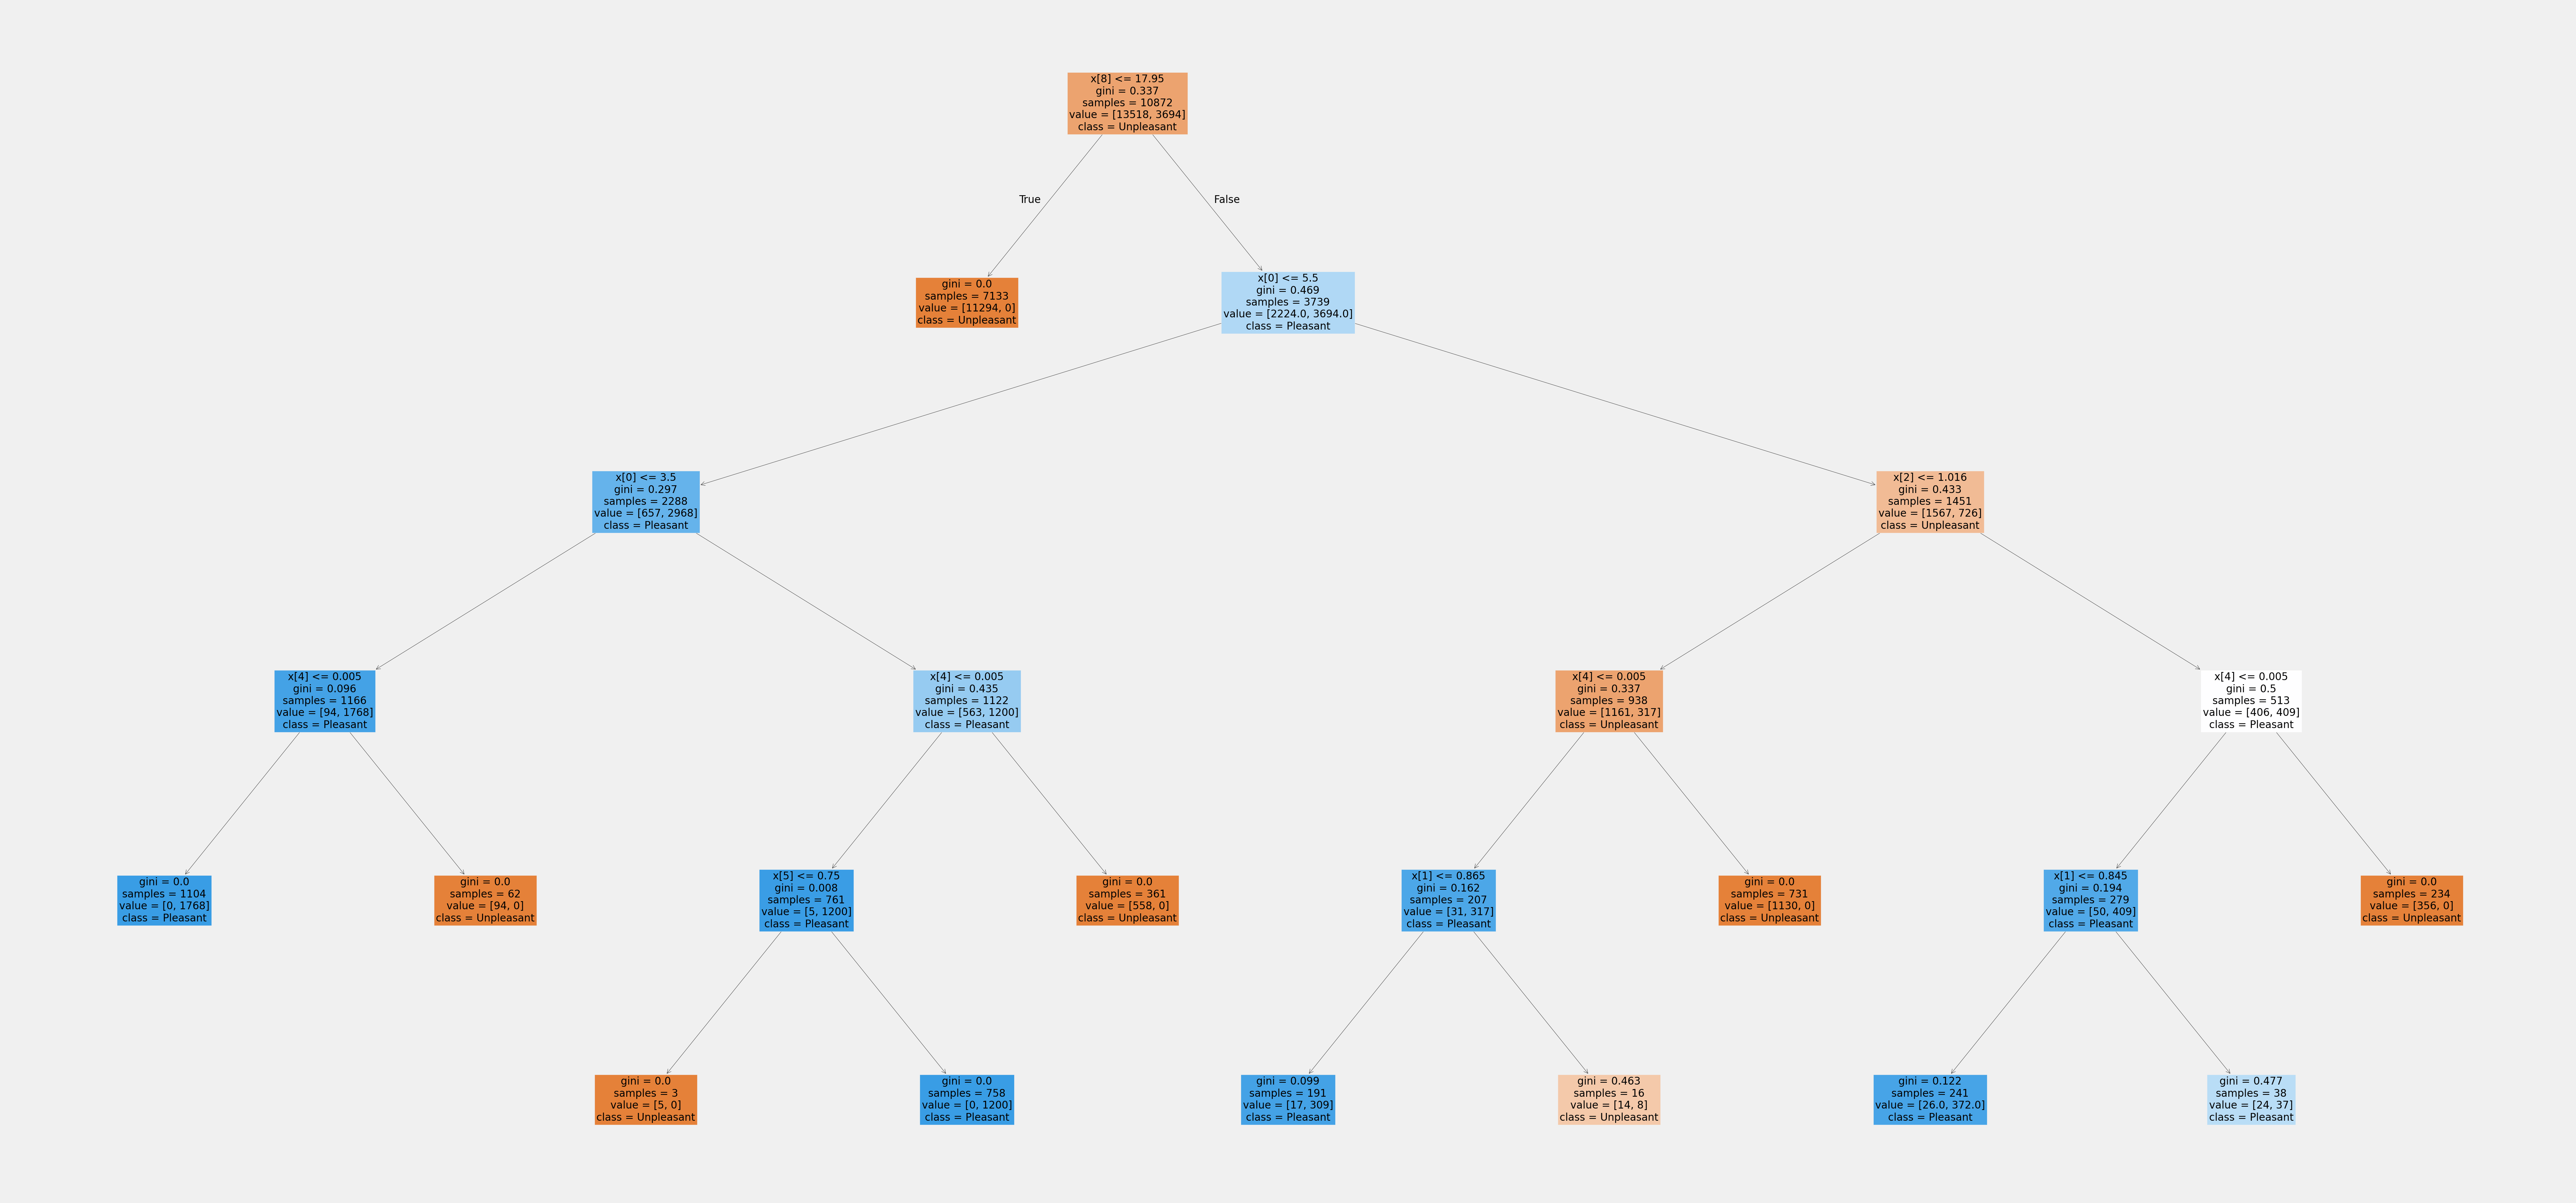

In [128]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], fontsize = 20, class_names=['Unpleasant', 'Pleasant'], filled=True)
plt.show()

### List of feature importances

In [129]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03792175, 0.02049294, 0.00919901, 0.09118612, 0.31632674,
       0.07434375, 0.1410172 , 0.01769402, 0.29181846])

In [130]:
important = pd.Series(newarray, index = observations) #.sort_values(ascending = False)
important

cloud_cover         0.037922
humidity            0.020493
pressure            0.009199
global_radiation    0.091186
precipitation       0.316327
sunshine            0.074344
temp_mean           0.141017
temp_min            0.017694
temp_max            0.291818
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


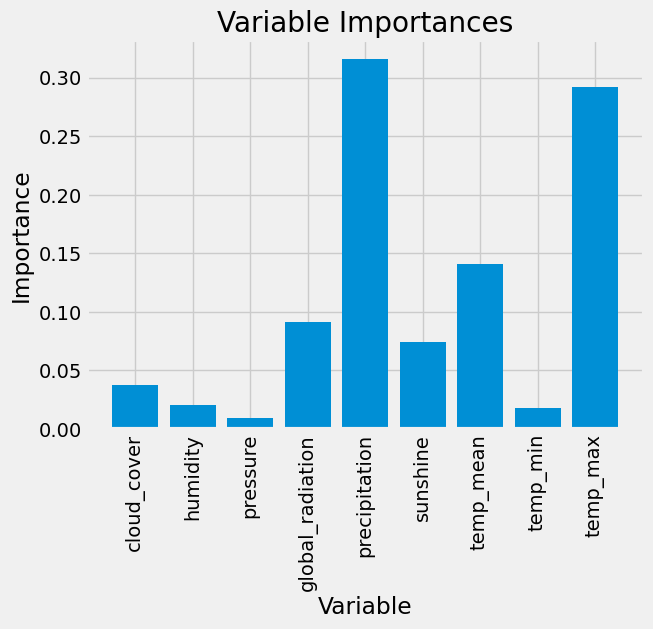

In [131]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(observations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, observations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()